In [42]:
import pandas as pd
import numpy as np

In [43]:
df_temp = pd.read_csv('./db/GlobalLandTemperaturesByCountry.csv')
df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.4,2.3,Åland
1,1743-12-01,nan,nan,Åland
2,1744-01-01,nan,nan,Åland
3,1744-02-01,nan,nan,Åland
4,1744-03-01,nan,nan,Åland


In [44]:
df_temp.shape

(577462, 4)

In [45]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [46]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [47]:
#convertir variable a tipo datetime
df_temp['year']= pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [48]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.8,0.5,Åland,1970-02-01
2716,1970-03-01,-1.6,0.6,Åland,1970-03-01
2717,1970-04-01,0.5,0.5,Åland,1970-04-01
2718,1970-05-01,6.9,0.6,Åland,1970-05-01
2719,1970-06-01,14.3,0.7,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.1,1.0,Zimbabwe,2013-05-01
577458,2013-06-01,17.6,0.5,Zimbabwe,2013-06-01
577459,2013-07-01,17.0,0.5,Zimbabwe,2013-07-01
577460,2013-08-01,19.8,0.7,Zimbabwe,2013-08-01


In [49]:
df_t_avg=df_temp.groupby(['Country',pd.Grouper(key='year',freq='1Y')]).agg({'AverageTemperature':[np.mean,np.median]})
df_t_avg

AverageTemperature       
                                     mean median
Country     year                                
Afghanistan 1970-12-31               16.0   16.2
            1971-12-31               14.8   14.9
            1972-12-31               12.5   13.9
            1973-12-31               14.2   14.9
            1974-12-31               13.3   13.6
...                                   ...    ...
Åland       2009-12-31                6.5    5.6
            2010-12-31                4.9    4.8
            2011-12-31                7.2    7.5
            2012-12-31                6.1    6.3
            2013-12-31                6.2    6.0

[10692 rows x 2 columns]

<AxesSubplot:xlabel='year'>

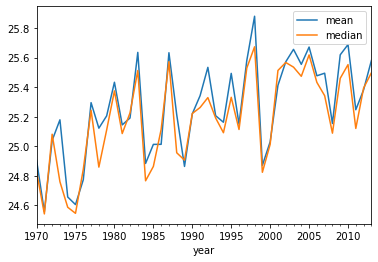

In [50]:
df_t_avg.xs('Colombia')['AverageTemperature'].plot()

In [51]:
df_t_med=df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.2
1,Afghanistan,1971-12-31,14.9
2,Afghanistan,1972-12-31,13.9
3,Afghanistan,1973-12-31,14.9
4,Afghanistan,1974-12-31,13.6
...,...,...,...
10687,Åland,2009-12-31,5.6
10688,Åland,2010-12-31,4.8
10689,Åland,2011-12-31,7.5
10690,Åland,2012-12-31,6.3


In [52]:
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med['date'] 

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [53]:
df_t_med.rename(columns={'median':'temperature'},inplace=True)

In [54]:
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.2,1970
1,Afghanistan,1971-12-31,14.9,1971
2,Afghanistan,1972-12-31,13.9,1972
3,Afghanistan,1973-12-31,14.9,1973
4,Afghanistan,1974-12-31,13.6,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.6,2009
10688,Åland,2010-12-31,4.8,2010
10689,Åland,2011-12-31,7.5,2011
10690,Åland,2012-12-31,6.3,2012


In [55]:
df_t_pivot = df_t_med.pivot_table(values='temperature',index='date',columns='Country')
df_t_pivot 

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.2,25.2,12.4,23.3,26.7,11.6,23.0,27.2,27.2,15.1,...,15.8,15.5,25.3,24.6,26.7,23.8,27.4,22.1,23.3,6.9
1971,14.9,24.8,11.7,22.8,26.5,11.9,22.5,26.5,26.4,14.8,...,16.5,13.0,24.6,24.1,26.2,20.3,26.5,21.8,22.7,4.5
1972,13.9,25.1,11.2,22.5,26.8,10.0,22.6,26.9,26.8,14.3,...,16.9,13.6,25.3,24.5,26.6,21.4,26.8,22.0,22.4,5.6
1973,14.9,25.3,11.8,23.0,27.0,9.6,23.1,27.3,27.2,14.9,...,17.5,13.5,25.2,25.0,27.1,22.9,27.2,22.1,22.6,3.6
1974,13.6,24.8,11.3,21.6,26.6,8.2,22.3,26.6,26.5,15.2,...,17.4,13.2,25.1,24.4,26.2,21.6,26.6,21.6,21.3,5.5
1975,13.5,24.8,12.4,23.1,26.7,10.4,22.4,26.5,26.3,15.2,...,17.2,13.3,25.0,25.0,26.3,20.5,26.1,21.9,21.8,6.0
1976,14.2,24.8,12.6,22.3,26.6,9.7,22.1,27.0,26.8,14.4,...,16.6,11.4,25.1,24.5,26.7,20.5,26.3,21.7,22.0,4.4
1977,15.7,25.0,12.0,23.5,26.7,10.4,22.6,27.2,27.0,16.0,...,18.3,13.8,25.6,24.6,26.9,22.7,26.9,22.2,22.3,5.5
1978,15.3,24.9,11.5,22.6,26.7,9.8,22.7,27.2,27.0,15.3,...,17.2,13.3,25.6,24.4,27.0,21.8,27.0,22.1,22.6,5.7


<AxesSubplot:>

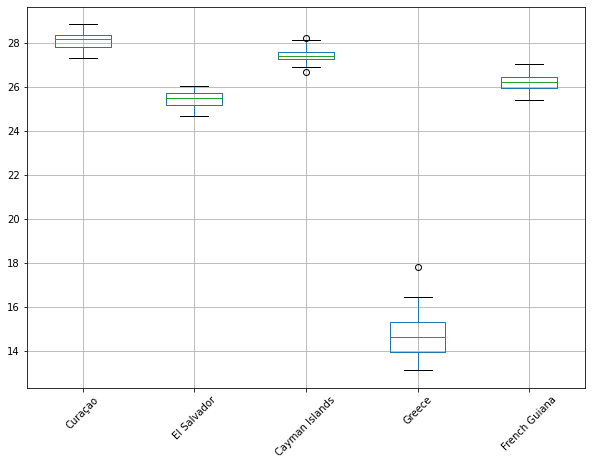

In [56]:
df_t_pivot.T.sample(5).T.boxplot(rot=45,figsize=(10,7))

In [57]:
df_agri = pd.read_csv('./db/API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv', header = 2)
df_fore = pd.read_csv('./db/API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv', header = 2)
df_elec = pd.read_csv('./db/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv', header = 2)
df_co2e = pd.read_csv('./db/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv', header = 2)
df_popu = pd.read_csv('./db/API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', header = 2)

In [58]:
cols =['Country Name', 'Country Code']+list(map(str,range(1971,2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [59]:
df_agri.loc[:,cols].melt(id_vars=['Country Name', 'Country Code']).rename(
    columns={ 'variable' : 'date',
                'Country Name' : 'Country',
                'Country Code' : 'Name',
                'value': 'agriculture'})

,Country,Name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,"380,360.0"
2,Angola,AGO,1971,"574,000.0"
3,Albania,ALB,1971,"12,000.0"
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,nan
11612,"Yemen, Rep.",YEM,2014,"235,460.0"
11613,South Africa,ZAF,2014,"968,410.0"
11614,Zambia,ZMB,2014,"238,360.0"


In [60]:
def formato(df,col= 'agricultura'):
    return df.loc[:,cols].melt(id_vars=['Country Name', 'Country Code']).rename(
            columns={ 'variable' : 'date',
                'Country Name' : 'Country',
                'Country Code' : 'name',
                'value': col})

In [61]:
df_agri = formato(df_agri,col= 'agricultura')
df_fore = formato(df_fore,col= 'forest')
df_elec = formato(df_elec,col= 'electricprod')
df_co2e = formato(df_co2e,col= 'co2')
df_popu = formato(df_popu,col= 'population')


In [62]:
df_fore['date']=df_fore['date'].astype(float)
df_agri['date']=df_agri['date'].astype(float)
df_elec['date']=df_elec['date'].astype(float)
df_co2e['date']=df_co2e['date'].astype(float)
df_popu['date']=df_popu['date'].astype(float)

In [63]:
df_merge = pd.merge(df_t_med[['Country','temperature','date']],df_popu , on = ['Country','date'], how = 'inner')
df_merge

,Country,temperature,date,name,population
0,Afghanistan,14.9,1971,AFG,"11,475,445.0"
1,Afghanistan,13.9,1972,AFG,"11,791,215.0"
2,Afghanistan,14.9,1973,AFG,"12,108,963.0"
3,Afghanistan,13.6,1974,AFG,"12,412,950.0"
4,Afghanistan,13.5,1975,AFG,"12,689,160.0"
...,...,...,...,...,...
7219,Zimbabwe,22.5,2009,ZWE,"12,526,968.0"
7220,Zimbabwe,23.3,2010,ZWE,"12,697,723.0"
7221,Zimbabwe,22.9,2011,ZWE,"12,894,316.0"
7222,Zimbabwe,23.0,2012,ZWE,"13,115,131.0"


In [64]:
def fun_merge(df1,df2):
    return pd.merge(df1,df2,on=['Country','name','date'], how = 'inner')

In [65]:
df_merge = fun_merge(df_merge,df_co2e)
df_merge = fun_merge(df_merge,df_elec)
df_merge = fun_merge(df_merge,df_agri)
df_merge = fun_merge(df_merge,df_fore)
df_merge


,Country,temperature,date,name,population,co2,electricprod,agricultura,forest
0,Afghanistan,14.9,1971,AFG,"11,475,445.0","1,895.8",nan,"380,360.0",nan
1,Afghanistan,13.9,1972,AFG,"11,791,215.0","1,532.8",nan,"380,460.0",nan
2,Afghanistan,14.9,1973,AFG,"12,108,963.0","1,639.1",nan,"380,480.0",nan
3,Afghanistan,13.6,1974,AFG,"12,412,950.0","1,917.8",nan,"380,480.0",nan
4,Afghanistan,13.5,1975,AFG,"12,689,160.0","2,126.9",nan,"380,480.0",nan
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.5,2009,ZWE,"12,526,968.0","5,603.2",585.5,"163,000.0","159,510.0"
7220,Zimbabwe,23.3,2010,ZWE,"12,697,723.0","7,777.7",606.6,"162,000.0","156,240.0"
7221,Zimbabwe,22.9,2011,ZWE,"12,894,316.0","9,563.5",636.2,"164,000.0","153,116.0"
7222,Zimbabwe,23.0,2012,ZWE,"13,115,131.0","7,792.4",608.8,"162,000.0","149,992.0"


In [66]:
df_climate=df_merge.dropna()

In [67]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,202,082.9
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

In [68]:
pd.set_option('display.float_format','{:,.1f}'.format)

In [69]:
first_10 =df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [70]:
df_max_co2 = df_climate[df_climate['Country'].isin(['United States', 'China', 'Japan', 'India', 'Germany','United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_max_co2

,Country,temperature,date,name,population,co2,electricprod,agricultura,forest
1266,Canada,-4.6,1990,CAN,"27,691,138.0","435,181.2","16,167.4","677,680.0","3,482,730.0"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","426,780.1","16,181.6","677,530.0","3,482,259.1"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","440,978.8","16,164.4","678,140.0","3,481,788.1"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","445,580.8","16,320.1","678,740.0","3,481,316.9"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","456,849.5","16,388.3","679,340.0","3,480,845.9"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","5,263,505.5","12,913.7","4,099,606.9","3,079,274.1"
7005,United States,10.2,2010,USA,"309,326,085.0","5,395,532.1","13,394.9","4,084,261.9","3,087,200.0"
7006,United States,9.5,2011,USA,"311,580,009.0","5,289,680.5","13,246.0","4,046,693.1","3,089,950.0"
7007,United States,9.9,2012,USA,"313,874,218.0","5,119,436.4","12,964.3","4,087,065.0","3,092,700.0"


<AxesSubplot:xlabel='population', ylabel='co2'>

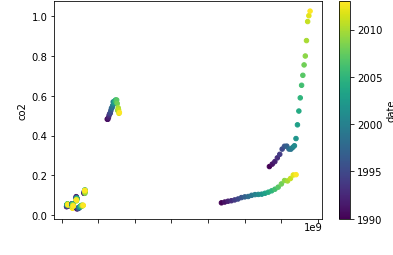

In [71]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap='viridis')


In [72]:
df_climate.corr()

,temperature,date,population,co2,electricprod,agricultura,forest
temperature,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.0,0.6,0.4
co2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
electricprod,-0.4,0.1,-0.0,0.2,1.0,0.1,0.2
agricultura,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


In [73]:
import seaborn as sns

<AxesSubplot:>

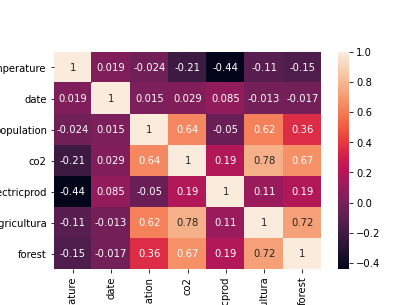

In [74]:
sns.heatmap(df_climate.corr(),annot=True)

In [75]:
df_med=df_climate.groupby('date').median()
df_med

,temperature,population,co2,electricprod,agricultura,forest
date,,,,,,
1990,22.7,"10,213,863.0","31,363.9","1,114.7","90,195.0","54,005.0"
1991,22.4,"10,346,663.5","27,343.0","1,072.5","91,870.0","60,307.5"
1992,19.9,"9,188,305.5","26,420.7","1,451.8","89,700.0","45,621.0"
1993,20.6,"9,951,683.5","28,267.1","1,520.3","89,890.0","44,579.0"
1994,20.7,"9,991,525.0","29,640.4","1,576.8","89,150.0","42,572.0"
1995,20.1,"10,026,176.0","29,090.3","1,578.3","81,080.0","41,640.0"
1996,20.2,"10,063,945.0","30,670.8","1,687.1","79,870.0","41,270.0"
1997,20.4,"10,108,977.0","30,623.1","1,762.4","80,120.0","41,270.0"
1998,21.5,"10,069,000.0","31,675.5","1,807.3","80,550.0","40,834.0"


<AxesSubplot:>

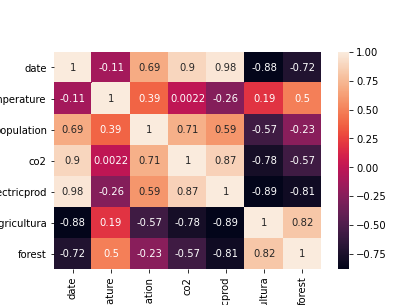

In [76]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

In [77]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='date', ylabel='date'>,
        <AxesSubplot:xlabel='temperature', ylabel='date'>,
        <AxesSubplot:xlabel='population', ylabel='date'>,
        <AxesSubplot:xlabel='co2', ylabel='date'>,
        <AxesSubplot:xlabel='electricprod', ylabel='date'>,
        <AxesSubplot:xlabel='agricultura', ylabel='date'>,
        <AxesSubplot:xlabel='forest', ylabel='date'>],
       [<AxesSubplot:xlabel='date', ylabel='temperature'>,
        <AxesSubplot:xlabel='temperature', ylabel='temperature'>,
        <AxesSubplot:xlabel='population', ylabel='temperature'>,
        <AxesSubplot:xlabel='co2', ylabel='temperature'>,
        <AxesSubplot:xlabel='electricprod', ylabel='temperature'>,
        <AxesSubplot:xlabel='agricultura', ylabel='temperature'>,
        <AxesSubplot:xlabel='forest', ylabel='temperature'>],
       [<AxesSubplot:xlabel='date', ylabel='population'>,
        <AxesSubplot:xlabel='temperature', ylabel='population'>,
        <AxesSubplot:xlabel='population'

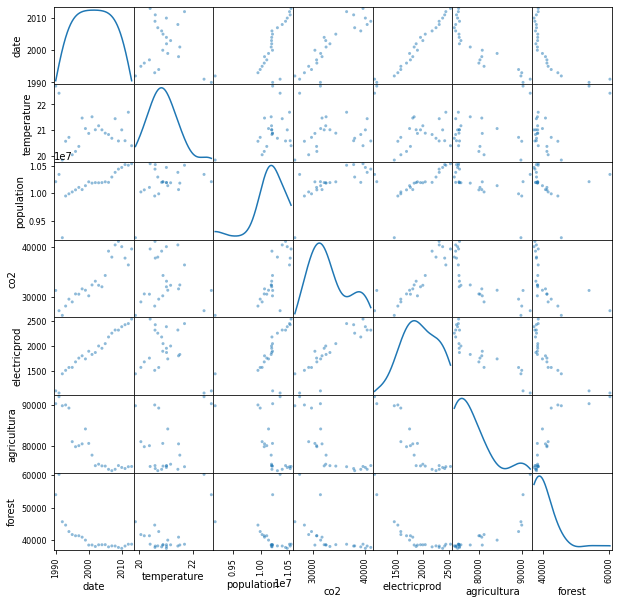

In [78]:
scatter_matrix(df_med.reset_index(),diagonal='kde',figsize=(10,10))

In [79]:
from pandas.plotting import parallel_coordinates

In [80]:
df_samerica = df_climate[
    df_climate['Country'].isin(['Colombia',
    'Argentina',
    'Bolivia',
    'Mexico',
    'Peru',
    'Chile'])
][['Country',
    'temperature',
    'co2',
    'agricultura',
    'forest']]

<AxesSubplot:>

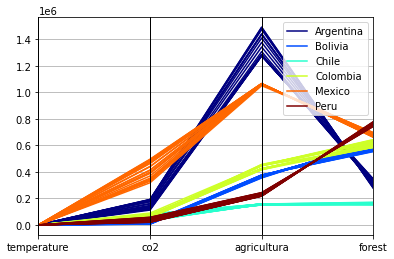

In [81]:
parallel_coordinates(df_samerica,'Country',colormap='jet')